<a href="https://colab.research.google.com/github/vk8teen/data_sci_projects/blob/main/Growth_Rate_Trend_of_India.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

path = '/content/drive/MyDrive/Scaler/datasets/API_NY.GDP.MKTP.KD.ZG_DS2_en_csv_v2_6298243.csv'
df = pd.read_csv(path, skiprows = 4)
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,ABW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.586575,-0.623626,1.719624,7.048533,2.381730,-2.302837,-23.982580,27.639357,10.458317,NaN
1,Africa Eastern and Southern,AFE,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,0.254876,7.965827,5.148206,4.579317,5.346211,...,4.007577,2.965062,2.219015,2.571941,2.491355,2.040617,-2.799038,4.300441,3.435138,NaN
2,Afghanistan,AFG,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,2.724543,1.451315,2.260314,2.647003,1.189228,3.911603,-2.351101,-20.738839,NaN,NaN
3,Africa Western and Central,AFW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,1.857727,3.772943,7.277246,5.412950,4.084749,...,5.926266,2.813543,0.142092,2.286270,2.838829,3.200919,-0.938162,3.976317,3.766354,NaN
4,Angola,AGO,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,4.822559,0.943572,-2.580111,-0.147150,-1.316362,-0.702273,-5.638215,1.199211,3.045403,NaN


In [5]:
df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       'Unnamed: 67'],
      dtype='object')

In [8]:
df.nunique()

Country Name      266
Country Code      266
Indicator Name      1
Indicator Code      1
1960                0
                 ... 
2019              256
2020              256
2021              254
2022              242
Unnamed: 67         0
Length: 68, dtype: int64

In [11]:
df_cleaned = df.drop(columns = ['Indicator Name','Indicator Code', 'Unnamed: 67'])
df_cleaned.columns

Index(['Country Name', 'Country Code', '1960', '1961', '1962', '1963', '1964',
       '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973',
       '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020', '2021', '2022'],
      dtype='object')

In [39]:
df_melted = pd.melt(df_cleaned, id_vars = ['Country Name', 'Country Code'], var_name = 'Year', value_name = 'growth_rate')
df_melted.head()


,Country Name,Country Code,Year,growth_rate
0,Aruba,ABW,1960,NaN
1,Africa Eastern and Southern,AFE,1960,NaN
2,Afghanistan,AFG,1960,NaN
3,Africa Western and Central,AFW,1960,NaN
4,Angola,AGO,1960,NaN


In [42]:
df_melted[df_melted['Country Name']== 'Aruba']

,Country Name,Country Code,Year,growth_rate
0,Aruba,ABW,1960,NaN
266,Aruba,ABW,1961,NaN
532,Aruba,ABW,1962,NaN
798,Aruba,ABW,1963,NaN
1064,Aruba,ABW,1964,NaN
...,...,...,...,...
15428,Aruba,ABW,2018,2.381730
15694,Aruba,ABW,2019,-2.302837
15960,Aruba,ABW,2020,-23.982580
16226,Aruba,ABW,2021,27.639357


In [24]:
df_melted['Year'] = df_melted['Year'].astype(int)
missing_values = df_melted.isnull().sum()
missing_values

Country Name       0
Country Code       0
Year               0
growth_rate     4006
dtype: int64

In [54]:
selected_countries = ["United States", "China", "India", "Germany", "Brazil"]
df_selected = df_melted[df_melted['Country Name'].isin(selected_countries)]
df_selected

,Country Name,Country Code,Year,growth_rate
29,Brazil,BRA,1960,NaN
40,China,CHN,1960,NaN
55,Germany,DEU,1960,NaN
109,India,IND,1960,NaN
251,United States,USA,1960,NaN
...,...,...,...,...
16521,Brazil,BRA,2022,2.900531
16532,China,CHN,2022,2.989084
16547,Germany,DEU,2022,1.806209
16601,India,IND,2022,7.239693


In [57]:
df_selected_avg_growth = df_selected.groupby(['Country Name', 'Year'])['growth_rate'].mean().reset_index()
df_selected_avg_growth

,Country Name,Year,growth_rate
0,Brazil,1960,NaN
1,Brazil,1961,8.600000
2,Brazil,1962,6.600000
3,Brazil,1963,0.600000
4,Brazil,1964,3.400000
...,...,...,...
310,United States,2018,2.945385
311,United States,2019,2.294439
312,United States,2020,-2.767803
313,United States,2021,5.945485


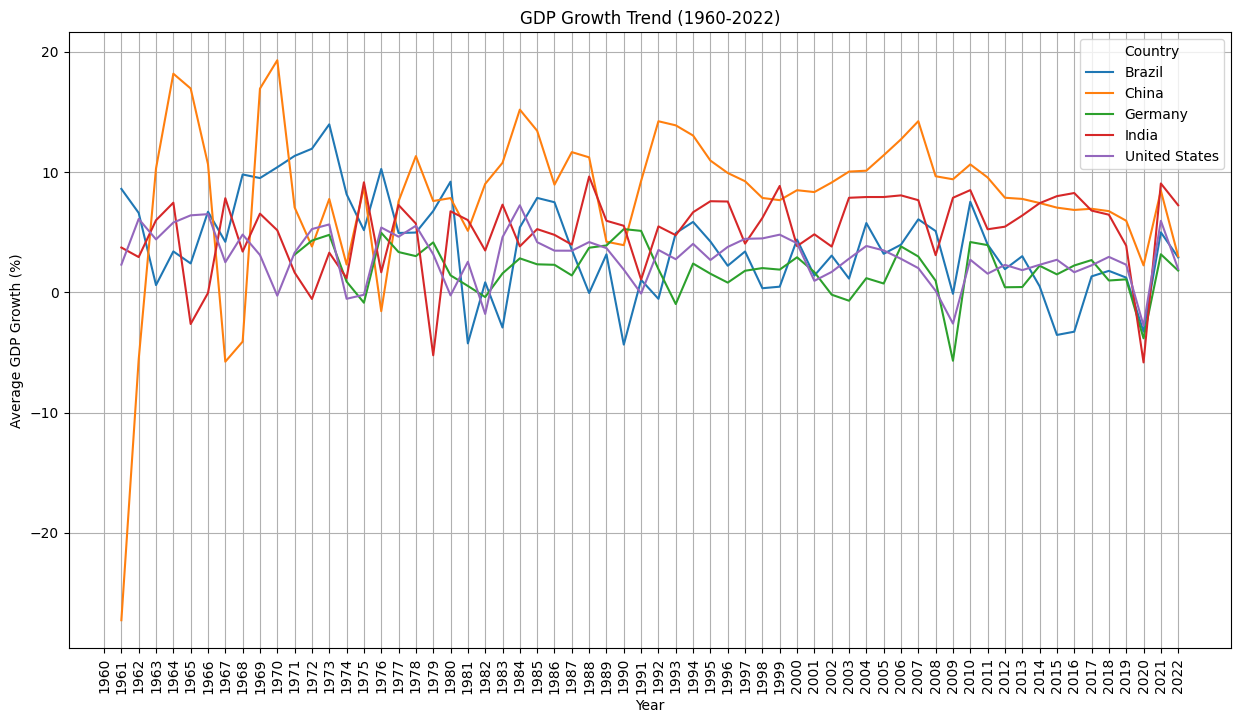

In [60]:
plt.figure(figsize=(15, 8))
sns.lineplot(x='Year', y='growth_rate', hue='Country Name', data=df_selected_avg_growth)
plt.xticks(rotation='vertical')
plt.title('GDP Growth Trend (1960-2022)')
plt.xlabel('Year')
plt.ylabel('Average GDP Growth (%)')
plt.legend(title='Country')
plt.grid(True)
plt.show()

##**Objective**

**To understand where India stands in comparison to other economies**

1. **GDP Growth Trend**: Examination of India's GDP growth trend over the years and it's comparision with other major economies and global averages has been done.

2. **Comparison with Developed and Emerging Economies**: Comparision of  India's economic performance with both developed countries (like the United States, Germany) and other emerging economies (like China, Brazil) has been done.


##**Analysis**

The line plot above illustrates the GDP growth trends from 1960 to 2022 for India and other major economies: United States, China, Germany, and Brazil.

## **Observations**:

1. **India's Growth Trajectory**: India shows a significant growth trajectory, especially noticeable from the late 20th century onwards. There are periods of rapid growth, highlighting its status as one of the world's major emerging economies.

2. **Comparison with Developed Economies**: Compared to developed economies like the United States and Germany, India demonstrates higher growth rates in many years. However, the growth in developed economies is generally more stable.

3. **Comparison with China**: China, another major emerging economy, often shows higher growth rates than India, particularly in the last few decades.


**Additionally**

If available, we could have also look at other economic indicators such as inflation rates, FDI inflows, and per capita income to provide a more comprehensive picture.
